In [169]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib

In [170]:
data_dir='D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class'

In [171]:
data_root=pathlib.Path(data_dir)

In [172]:
data_root

WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class')

In [173]:
for item in data_root.iterdir():
    print (item)

D:\Study\深度学习\日月光华-tensorflow入门与实战资料\数据集\卫星图像识别数据\2_class\airplane
D:\Study\深度学习\日月光华-tensorflow入门与实战资料\数据集\卫星图像识别数据\2_class\lake


In [174]:
all_image_path=list(data_root.glob('*/*'))#提取所有文件,并变成列表

In [175]:
len(all_image_path)

1400

In [176]:
all_image_path[3:]

[WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_004.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_005.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_006.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_007.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_008.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_009.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_010.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_011.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_012.jpg'),
 WindowsPath('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/airplane/airplane_0

In [177]:
all_image_path=[str(path) for path in all_image_path]#变成实际路径，消掉windowspath

In [178]:
all_image_path[10:12]

['D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\airplane\\airplane_011.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\airplane\\airplane_012.jpg']

In [179]:
import random

In [180]:
random.shuffle(all_image_path)

In [181]:
all_image_path[10:12]

['D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\airplane\\airplane_011.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_099.jpg']

In [182]:
image_count=len(all_image_path)
image_count

1400

In [183]:
label_names=sorted(item.name for item in data_root.glob('*/'))#提取目录，取出名字并首字母排序

In [184]:
label_names

['airplane', 'lake']

In [185]:
label_to_index=dict((name,index) for index,name in enumerate(label_names))

In [186]:
label_to_index

{'airplane': 0, 'lake': 1}

In [187]:
all_image_path[:3]

['D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_679.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_343.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_677.jpg']

In [188]:
pathlib.Path('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/卫星图像识别数据/2_class/lake/lake_060.jpg                    ').parent.name#提取上一级的名字

'lake'

In [189]:
all_image_label=[label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [190]:
all_image_label[:5]

[1, 1, 1, 1, 0]

In [191]:
all_image_path[:5]

['D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_679.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_343.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_677.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_184.jpg',
 'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\airplane\\airplane_390.jpg']

In [192]:
import IPython .display as display

In [193]:
index_to_label = dict((v,k) for k,v in label_to_index.items())

In [194]:
index_to_label

{0: 'airplane', 1: 'lake'}

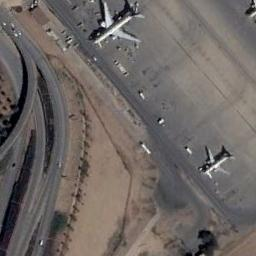

airplane



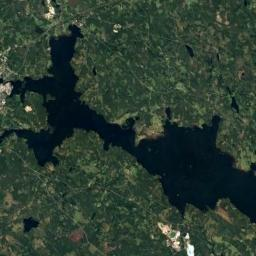

lake



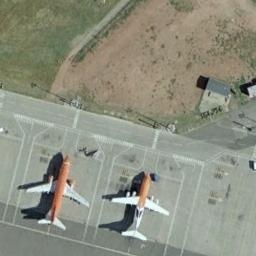

airplane



In [195]:
for n in range(3):
    image_index=random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])
    print()

In [196]:
img_path=all_image_path[0]

In [197]:
img_path

'D:\\Study\\深度学习\\日月光华-tensorflow入门与实战资料\\数据集\\卫星图像识别数据\\2_class\\lake\\lake_679.jpg'

In [198]:
img_raw=tf.io.read_file(img_path)

In [199]:
img_tensor=tf.image.decode_image(img_raw)

In [200]:
img_tensor.shape

TensorShape([256, 256, 3])

In [201]:
img_tensor.dtype

tf.uint8

In [202]:
img_tensor = tf.cast(img_tensor, tf.float32)#转换数据类型

In [203]:
img_tensor=img_tensor/255

In [204]:
img_tensor.numpy().max()

1.0

In [205]:
img_tensor.numpy().min()

0.019607844

In [229]:
def load_preprosess_image(img_path):
    img_raw=tf.io.read_file(img_path)
    img_tensor=tf.image.decode_jpeg(img_raw,channels=3)#jpeg格式。channel代表彩色图片
    img_tensor=tf.image.resize(img_tensor,[256,256])
    img_tensor = tf.cast(img_tensor, tf.float32)
    img=img_tensor/255
    return img

In [230]:
image_path=all_image_path[100]

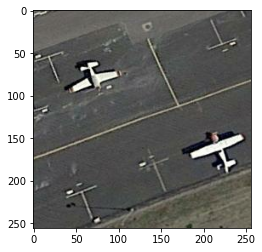

In [231]:
plt.imshow(load_preprosess_image(image_path))

In [209]:
path_ds=tf.data.Dataset.from_tensor_slices(all_image_path)

In [210]:
image_dataset=path_ds.map(load_preprosess_image)

In [232]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [233]:
label_dataset=tf.data.Dataset.from_tensor_slices(all_image_label)

In [234]:
label_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [235]:
for label in label_dataset.take(10):
    print(label.numpy())

1
1
1
1
0
0
1
0
0
1


In [236]:
for image in image_dataset.take(1):
    print(image)

tf.Tensor(
[[[0.27058825 0.29411766 0.23921569]
  [0.3137255  0.3372549  0.28235295]
  [0.3372549  0.36862746 0.30980393]
  ...
  [0.18039216 0.2627451  0.20392157]
  [0.20392157 0.28627452 0.22745098]
  [0.22352941 0.30588236 0.24705882]]

 [[0.2901961  0.3137255  0.25882354]
  [0.32941177 0.3529412  0.29803923]
  [0.34509805 0.3764706  0.31764707]
  ...
  [0.17254902 0.25490198 0.19607843]
  [0.19215687 0.27450982 0.21568628]
  [0.20392157 0.28627452 0.22745098]]

 [[0.30980393 0.33333334 0.2784314 ]
  [0.34117648 0.3647059  0.30980393]
  [0.3529412  0.38431373 0.3254902 ]
  ...
  [0.16470589 0.24705882 0.1882353 ]
  [0.17254902 0.25490198 0.19607843]
  [0.18039216 0.2627451  0.20392157]]

 ...

 [[0.1764706  0.28627452 0.2       ]
  [0.18431373 0.29411766 0.20784314]
  [0.2        0.30980393 0.22352941]
  ...
  [0.20392157 0.2901961  0.24313726]
  [0.21568628 0.3019608  0.25490198]
  [0.21176471 0.29803923 0.2509804 ]]

 [[0.18431373 0.29803923 0.21176471]
  [0.19215687 0.30588236 0

In [238]:
dataset=tf.data.Dataset.zip((image_dataset,label_dataset))#合并

In [239]:
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [216]:
test_count=int(image_count*0.2)
train_count=image_count-test_count

In [240]:
test_count,train_count

(280, 1120)

In [217]:
train_dataset=dataset.skip(test_count)

In [218]:
test_dataset=dataset.take(test_count)

In [219]:
BATCH_SIZE=32

In [248]:
train_dataset=train_dataset.repeat().shuffle(buffer_size=train_count).batch(BATCH_SIZE)

In [249]:
test_dataset=test_dataset.batch(BATCH_SIZE)

In [250]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation='relu'))#填充的话 padding='same'
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) #2的n次方递增
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(1024,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [251]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 59, 59, 256)      

In [252]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [253]:
step_per_epoch=train_count//BATCH_SIZE
validation_steps=test_count//BATCH_SIZE

In [257]:
train_dataset,test_dataset

(<BatchDataset shapes: ((None, None, None, None, None, 256, 256, 3), (None, None, None, None, None)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, None, None, 256, 256, 3), (None, None, None)), types: (tf.float32, tf.int32)>)

In [259]:
history=model.fit(train_dataset,epochs=20.,steps_per_epoch=step_per_epoch,
                  validation_data=test_dataset,validation_steps=validation_steps)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3)))#填充的话 padding='same'
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

#dense同理